# Alunos

Renato Barboza da Costa - rbc4

Nicolau Neto - ntsn



# Link para o vídeo

#Video da primeira apresentação
https://youtu.be/0OV1Mt-WMlY

#Video da segunda apresentação
https://youtu.be/eOAP2IAWbJA

# Coleta de dados:





##Datasets utilizados

https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021

https://www.kaggle.com/datasets/varpit94/ethereum-data


# Descrição dos datasets

Dados sobre os valores das criptomoedas Bitcoin/Ethereum ao longo do tempo com suas altas, baixas, valores de fechamento do dia e volume de criptomoedas no mercado


# Importando libs

In [ ]:
import numpy as np
import pandas as pd
from numpy import log10
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import RidgeCV

# Extração de dados

In [ ]:
df_btc = pd.read_csv("BTC-USD.csv",sep=",")
df_eth = pd.read_csv("ETH-USD.csv",sep=",")

# Visualização de dados

## Bitcoin

In [ ]:
df_btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920
...,...,...,...,...,...,...,...
1593,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
1594,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
1595,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
1596,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


## Ethereum

In [ ]:
df_eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1593,2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098
1594,2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230
1595,2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658
1596,2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166


# Verificando ausência de dados em ambos datasets

In [ ]:
print(df_btc.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(df_eth.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Limpeza de dados

Analisando coluna por coluna, mostrando a quantidade de dados nulos do DataFrame, número total de entradas e datatypes de cada feature.

In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [ ]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


# Eliminando possíveis valores duplicados

Como vimos abaixo, não tivemos nenhum dado duplicado

In [ ]:
#verificando tamanho inicial dos datasets
df_btc_rows = len(df_btc)
df_eth_rows = len(df_eth)

print('Quantidade de linhas do dataframe (BTC):', str(df_btc_rows))
print('Quantidade de linhas do dataframe (ETH):', str(df_eth_rows))

Quantidade de linhas do dataframe (BTC): 1598
Quantidade de linhas do dataframe (ETH): 1598


In [ ]:
# Limpando dataframe BTC
df_btc = df_btc.drop_duplicates()
df_btc_rows = len(df_btc)

# Limpando dataframe ETH
df_eth = df_eth.drop_duplicates()
df_eth_rows = len(df_eth)

print('Quantidade de linhas após limpeza (BTC):', str(df_btc_rows))
print('Quantidade de linhas após limpeza (ETH):', str(df_eth_rows))

Quantidade de linhas após limpeza (BTC): 1598
Quantidade de linhas após limpeza (ETH): 1598


# Limpeza dos dados discrepantes

## Verificando valores negativos

## BTC

In [ ]:
# Analisando para o preço de baixa
df_btc[(df_btc['Low'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando para o preço de alta
df_btc[(df_btc['High'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe volume abaixo de zero
df_btc[(df_btc['Volume'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Abertura abaixo de zero
df_btc[(df_btc['Open'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Fechamento de mercado abaixo de zero
df_btc[(df_btc['Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Algum preço de fechamento ajustado abaixo de zero
df_btc[(df_btc['Adj Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


## ETH

In [ ]:
# Analisando para o preço de baixa
df_eth[(df_eth['Low'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando para o preço de alta
df_eth[(df_eth['High'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe volume abaixo de zero
df_eth[(df_eth['Volume'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Abertura abaixo de zero
df_eth[(df_eth['Open'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Fechamento de mercado abaixo de zero
df_eth[(df_eth['Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Algum preço de fechamento ajustado abaixo de zero
df_eth[(df_eth['Adj Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


# Limpeza de dados

Vamos tratar os outliers, que seriam os dados que fogem muito do nosso padrão e que por conta disso acabam dificultando o processo de generalização do seu modelo de predição

Vamos analisar as estatísticas dos nossos datasets usando o `describe()`

E utilizaremos a média do Volume para analisar os dados, descartando valores de volume elevados e baixos

In [ ]:
# BTC 
df_btc['Volume'].describe()

count    1.598000e+03
mean     2.527784e+10
std      2.058227e+10
min      2.923670e+09
25%      8.643615e+09
50%      2.175675e+10
75%      3.519543e+10
max      3.509679e+11
Name: Volume, dtype: float64

In [ ]:
# ETH
df_eth['Volume'].describe()

count    1.598000e+03
mean     1.245347e+10
std      1.121937e+10
min      6.217330e+08
25%      3.154440e+09
50%      9.525409e+09
75%      1.764118e+10
max      8.448291e+10
Name: Volume, dtype: float64

# Removendo Outliers de volume

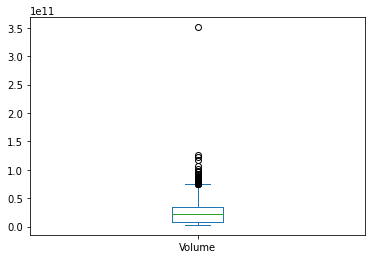

In [ ]:
# BTC Outliers
df_btc['Volume'].plot.box()

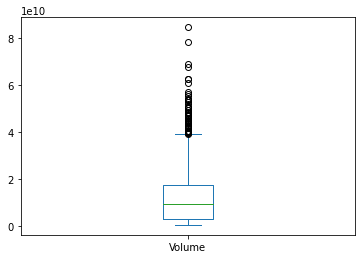

In [ ]:
# ETH Outliers
df_eth['Volume'].plot.box()

In [ ]:
# Definindo exclusão de outliers para valores maiores saiam da curva para mais ou para menos
def delete_volume_outliers(DataFrame):
  interval = DataFrame['Volume'].std()
  media = DataFrame['Volume'].mean()
  DataFrame.loc[DataFrame['Volume'] < (media - interval), 'Volume'] = np.nan
  DataFrame.loc[DataFrame['Volume'] > (media + interval), 'Volume'] = np.nan

delete_volume_outliers(df_btc)
delete_volume_outliers(df_eth)

# Dados após a eliminação dos outliers

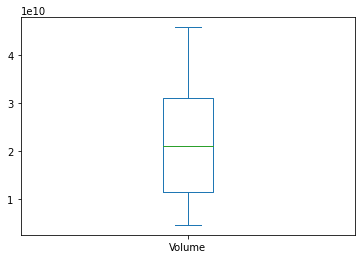

In [ ]:
# BTC Outliers
df_btc['Volume'].plot.box()

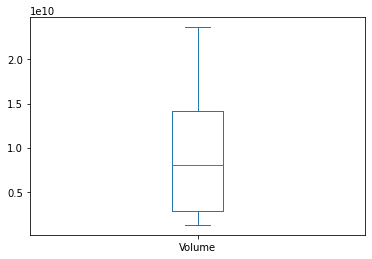

In [ ]:
# ETH Outliers
df_eth['Volume'].plot.box()

# Comparativo de preços após limpeza de dados

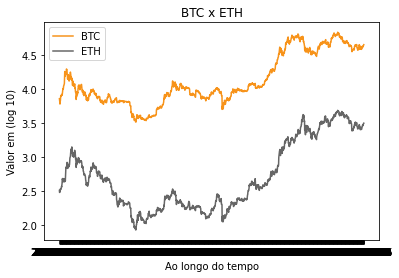

In [ ]:
df_btc['Close'] = log10(df_btc['Close'])
df_eth['Close'] = log10(df_eth['Close'])

plt.plot(df_btc['Date'], df_btc['Close'], color='#f7931a', label='BTC') 
plt.plot(df_eth['Date'], df_eth['Close'], color='#666666', label='ETH') 

plt.xlabel("Ao longo do tempo") 
plt.ylabel("Valor em (log 10)") 

plt.title("BTC x ETH") 

plt.legend() 
plt.show()

1. preco de fechamento
2. seprarar dados em treino, validacao e teste
3. escolher 4 algoritmos pra treino, validacao e teste
4. adicionar MLFlow no treinamento dos modelos pra rastreamento
5. executar uma ferramenta de selecao de hiper paramentros sobre o conj de validacao (máximo 3 hiper parametros)
6. Selecionar o modelo (algoritmo + parametros) com melhor resultado


--------------
LinearRegression (Linear)

logisticRegression (Linear)

BayesianRegression (Liner) 



In [ ]:
#criando novos campos de medias móveis
df_btc['mm5d'] = df_btc['Close'].rolling(5).mean()
df_btc['mm21d'] = df_btc['Close'].rolling(21).mean()

In [ ]:
#Empurrando para frente os valores das Criptos
df_btc['Close'] = df_btc['Close'].shift(-1)

#retirando os dados nulos
df_btc.dropna(inplace=True)

#reindexando o data frame
df_btc = df_btc.reset_index(drop=True)
df_btc

,Date,Open,High,Low,Close,Adj Close,Volume,mm5d,mm21d
0,2017-11-29,10077.400391,11517.400391,9601.030273,4.010028,9888.610352,1.156880e+10,3.980732,3.895147
1,2017-11-30,9906.790039,10801.000000,9202.049805,4.040428,10233.599609,8.310690e+09,3.993931,3.902581
2,2017-12-01,10198.599609,11046.700195,9694.650391,4.044328,10975.599609,6.783120e+09,4.008035,3.913042
3,2017-12-02,10978.299805,11320.200195,10905.099609,4.053969,11074.599609,5.138500e+09,4.018493,3.924520
4,2017-12-03,11082.700195,11858.700195,10862.000000,4.066594,11323.200195,6.608310e+09,4.028778,3.937827
...,...,...,...,...,...,...,...,...,...
1212,2022-03-20,42191.406250,42241.164063,41004.757813,4.613609,41247.824219,2.012795e+10,4.617676,4.607222
1213,2022-03-21,41246.132813,41454.410156,40668.042969,4.626944,41077.996094,2.461554e+10,4.617537,4.606184
1214,2022-03-22,41074.105469,43124.707031,40948.281250,4.632386,42358.808594,3.200465e+10,4.620472,4.605232
1215,2022-03-23,42364.378906,42893.507813,41877.507813,4.643067,42892.957031,2.524294e+10,4.622711,4.604741


In [ ]:
#verificando quantidade de linhas
qtd_linhas = len(df_btc)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:852 linhas teste= 852:1216 linhas validação= 1216'

In [ ]:
#separando as features e labels
features = df_btc.drop(['Date', 'Close'], 1)
labels = df_btc['Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#separando as features escolhidas
features = df_btc.loc[:,['Volume','mm5d']]

In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features) # Normalizando os dados de entrada(treinamento)
features_scale  = scaler.transform(features)       # Normalizando os dados de entrada(teste)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (1217, 2)
[[0.16697549 0.35472072]
 [0.0878105  0.36489708]
 [0.05069388 0.3757715 ]
 ...
 [0.66352224 0.84796324]
 [0.49922741 0.84968993]
 [0.64015599 0.85244253]]


In [ ]:
#Separa os dados de treino teste e validação
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

852 852
364 364


In [ ]:
#treinamento usando 4 algoritmos
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
linear_coef = r2_score(y_test, pred)

sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)
pred = sgdr.predict(X_test)
sgd_coef = r2_score(y_test, pred)

baye = BayesianRidge()
baye.fit(X_train, y_train)
pred = baye.predict(X_test)
bayesian_coef = r2_score(y_test, pred)

rCV = RidgeCV()
rCV.fit(X_train, y_train)
pred = rCV.predict(X_test)
rCV_coef = r2_score(y_test, pred)

f'Linear:{linear_coef * 100:.2f} Bayesian:{bayesian_coef * 100:.2f} SGD:{sgd_coef * 100:.2f} Ridge:{rCV_coef * 100:.2f}'

'Linear:98.64 Bayesian:98.64 SGD:78.90 Ridge:98.35'

In [ ]:
previsao = features_scale[qtd_linhas_teste:qtd_linhas]
data_full = df_btc['Date']
data = data_full[qtd_linhas_teste:qtd_linhas] 

res_full = df_btc['Close']
res = res_full[qtd_linhas_teste:qtd_linhas]

                real  previsao
data                          
2019-04-29       NaN  3.723529
2019-04-30  3.728413  3.725830
2019-05-01  3.732611  3.727759
2019-05-02  3.740780  3.731735
2019-05-03  3.761047  3.740119
...              ...       ...
2022-03-20  4.615401  4.607273
2022-03-21  4.613609  4.608136
2022-03-22  4.626944  4.612672
2022-03-23  4.632386  4.613367
2022-03-24  4.643067  4.618173

[852 rows x 2 columns]


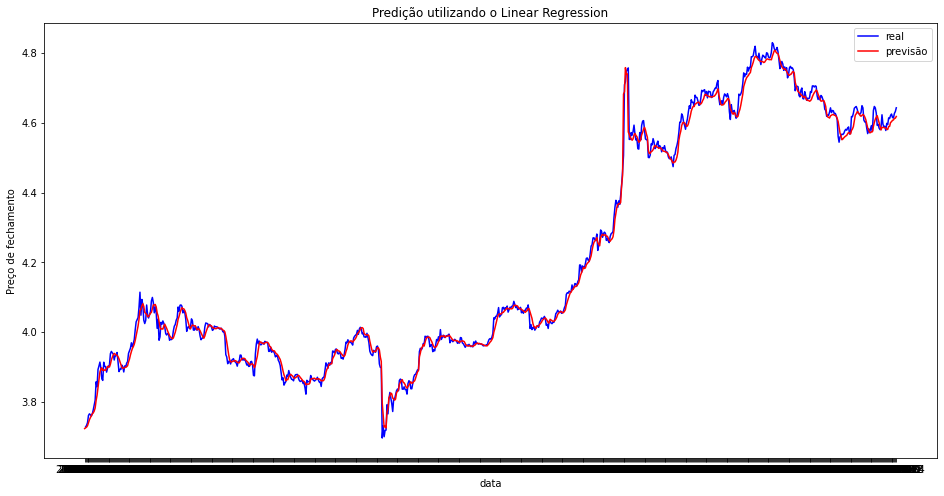

In [ ]:
#Predição utilizando o Linear Regression
pred = lr.predict(previsao)

df = pd.DataFrame({'data':data, 'real':res, 'previsao':pred})

df['real'] = df['real'].shift(+1)

df.set_index('data', inplace=True)
print(df)

plt.figure(figsize=(16,8))
plt.title("Predição utilizando o Linear Regression")
plt.plot(df['real'], label="real", color='Blue')
plt.plot(df['previsao'], label="previsão", color='red')
plt.xlabel('data')
plt.ylabel('Preço de fechamento')
leg= plt.legend()



                real  previsao
data                          
2019-04-29       NaN  3.715387
2019-04-30  3.728413  3.718665
2019-05-01  3.732611  3.718024
2019-05-02  3.740780  3.731289
2019-05-03  3.761047  3.780906
...              ...       ...
2022-03-20  4.615401  4.457964
2022-03-21  4.613609  4.506199
2022-03-22  4.626944  4.587998
2022-03-23  4.632386  4.516844
2022-03-24  4.643067  4.582003

[852 rows x 2 columns]


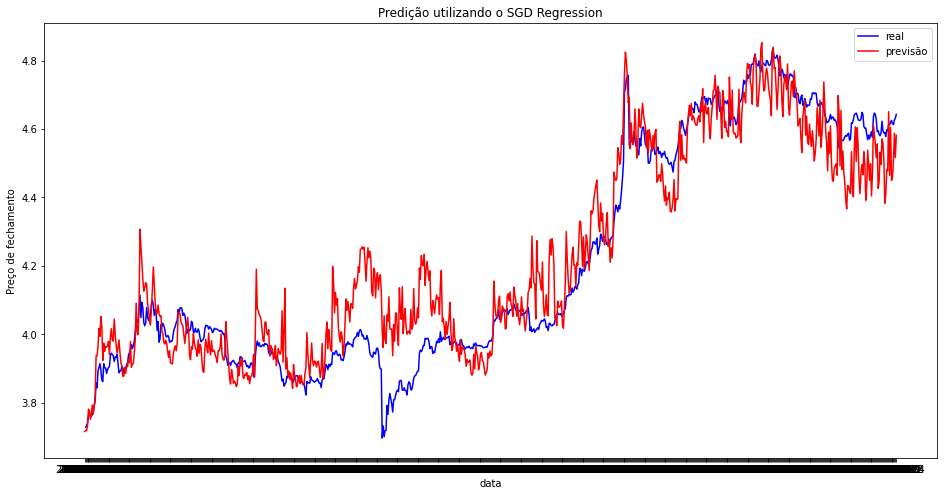

In [ ]:
#Predição utilizando o SGDRegressor
pred_sgdr = sgdr.predict(previsao)

df = pd.DataFrame({'data':data, 'real':res, 'previsao':pred_sgdr})

df['real'] = df['real'].shift(+1)

df.set_index('data', inplace=True)
print(df)

plt.figure(figsize=(16,8))
plt.title("Predição utilizando o SGD Regression")
plt.plot(df['real'], label="real", color='Blue')
plt.plot(df['previsao'], label="previsão", color='red')
plt.xlabel('data')
plt.ylabel('Preço de fechamento')
leg= plt.legend()

                real  previsao
data                          
2019-04-29       NaN  3.723541
2019-04-30  3.728413  3.725842
2019-05-01  3.732611  3.727771
2019-05-02  3.740780  3.731747
2019-05-03  3.761047  3.740132
...              ...       ...
2022-03-20  4.615401  4.607218
2022-03-21  4.613609  4.608083
2022-03-22  4.626944  4.612621
2022-03-23  4.632386  4.613314
2022-03-24  4.643067  4.618122

[852 rows x 2 columns]


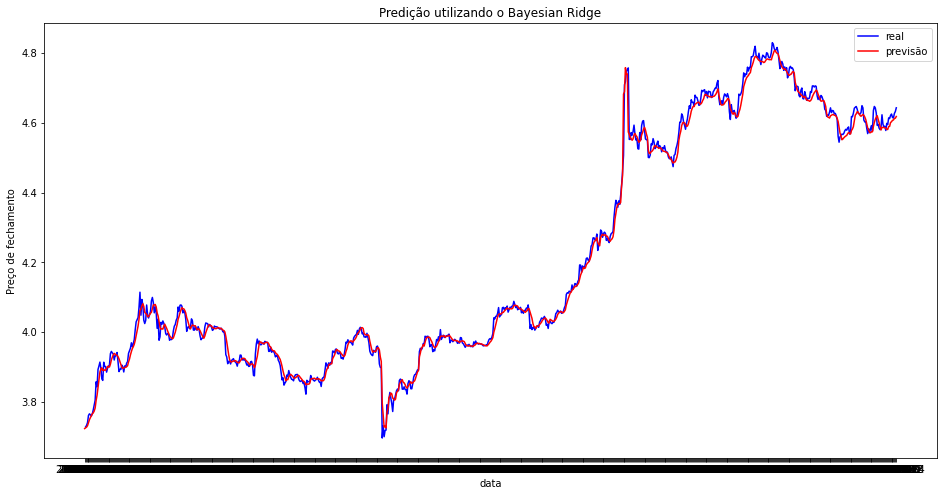

In [ ]:
#Predição utilizando o BayesianRidge
pred_baye = baye.predict(previsao)

df = pd.DataFrame({'data':data, 'real':res, 'previsao':pred_baye})

df['real'] = df['real'].shift(+1)

df.set_index('data', inplace=True)
print(df)

plt.figure(figsize=(16,8))
plt.title("Predição utilizando o Bayesian Ridge")
plt.plot(df['real'], label="real", color='Blue')
plt.plot(df['previsao'], label="previsão", color='red')
plt.xlabel('data')
plt.ylabel('Preço de fechamento')
leg= plt.legend()

                real  previsao
data                          
2019-04-29       NaN  3.724820
2019-04-30  3.728413  3.727108
2019-05-01  3.732611  3.729012
2019-05-02  3.740780  3.732996
2019-05-03  3.761047  3.741484
...              ...       ...
2022-03-20  4.615401  4.601480
2022-03-21  4.613609  4.602528
2022-03-22  4.626944  4.607341
2022-03-23  4.632386  4.607742
2022-03-24  4.643067  4.612755

[852 rows x 2 columns]


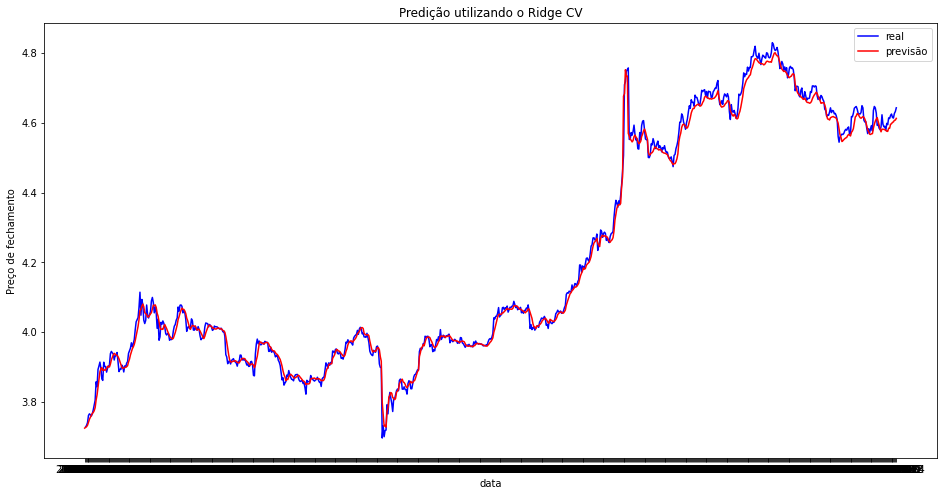

In [ ]:
#Predição utilizando o RidgeCV
pred_rCV = rCV.predict(previsao)

df = pd.DataFrame({'data':data, 'real':res, 'previsao':pred_rCV})

df['real'] = df['real'].shift(+1)

df.set_index('data', inplace=True)
print(df)

plt.figure(figsize=(16,8))
plt.title("Predição utilizando o Ridge CV")
plt.plot(df['real'], label="real", color='Blue')
plt.plot(df['previsao'], label="previsão", color='red')
plt.xlabel('data')
plt.ylabel('Preço de fechamento')
leg= plt.legend()